In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score 
from time import time

In [2]:
dataemp = pd.read_csv('employee_reviews.csv', sep = ",", index_col =0)

In [3]:
dataemp.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [4]:
dataemp.shape

(67529, 16)

In [5]:
dataemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67529 entries, 1 to 67529
Data columns (total 16 columns):
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 8.8+

In [6]:
dataemp.drop(columns = [ 'location', 'advice-to-mgmt', 'job-title', 'helpful-count', 'link'], inplace = True)

In [7]:
dataemp.describe()

,overall-ratings
count,67529.000000
mean,3.826075
std,1.154989
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
dataemp['work-balance-stars'] = pd.to_numeric(dataemp['work-balance-stars'].replace('none', np.nan))
dataemp['culture-values-stars'] = pd.to_numeric(dataemp['culture-values-stars'].replace('none', np.nan))
dataemp['carrer-opportunities-stars'] = pd.to_numeric(dataemp['carrer-opportunities-stars'].replace('none', np.nan))
dataemp['comp-benefit-stars'] = pd.to_numeric(dataemp['comp-benefit-stars'].replace('none', np.nan))
dataemp['senior-mangemnet-stars'] = pd.to_numeric(dataemp['senior-mangemnet-stars'].replace('none', np.nan))

In [9]:
dataemp.describe()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
count,67529.000000,60369.000000,53983.000000,60421.000000,60368.000000,59754.000000
mean,3.826075,3.373254,3.784451,3.634035,3.942503,3.322522
std,1.154989,1.299901,1.296220,1.225787,1.038597,1.312449
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,4.000000,3.500000,4.000000,4.000000,4.000000,3.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


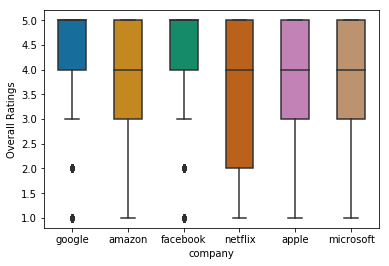

In [10]:

bplot = sns.boxplot(y='overall-ratings', x='company',  data=dataemp, width=0.5,palette="colorblind").set_ylabel("Overall Ratings")


          Overall Ratings by Company

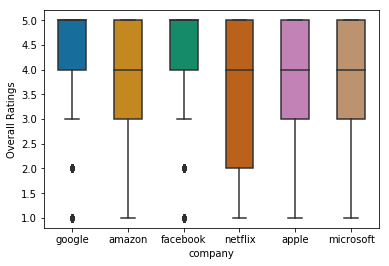

In [11]:
bplot = sns.boxplot(y='overall-ratings', x='company',  data=dataemp, width=0.5,palette="colorblind").set_ylabel("Overall Ratings")


          Work-Balance Rating by Company

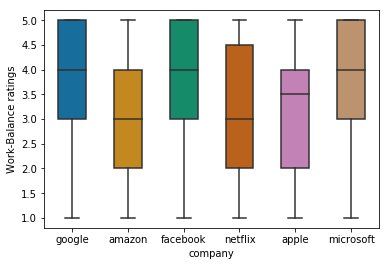

In [12]:
bplot = sns.boxplot(y='work-balance-stars', x='company',  data=dataemp, width=0.5,palette="colorblind").set_ylabel("Work-Balance ratings")

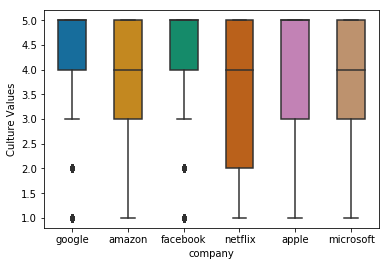

In [13]:
bplot = sns.boxplot(y='culture-values-stars', x='company',  data=dataemp, width=0.5,palette="colorblind").set_ylabel("Culture Values")

          Culture Values by Company

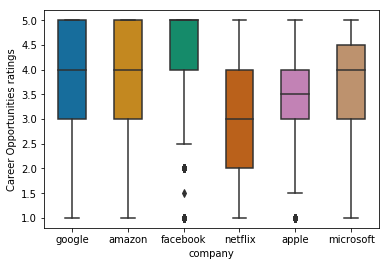

In [14]:
bplot = sns.boxplot(y='carrer-opportunities-stars', x='company',  data=dataemp, width=0.5,palette="colorblind").set_ylabel("Career Opportunities ratings")

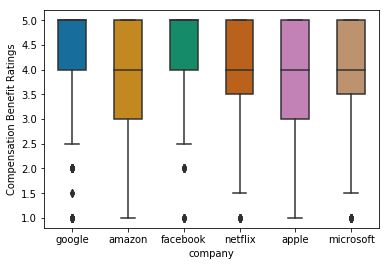

In [15]:
bplot = sns.boxplot(y='comp-benefit-stars', x='company',  data=dataemp, width=0.5,palette="colorblind").set_ylabel("Compensation Benefit Ratings")

     Compensation Benefits by Company

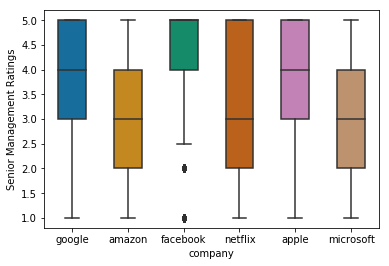

In [16]:
bplot = sns.boxplot(y='senior-mangemnet-stars', x='company',  data=dataemp, width=0.5,palette="colorblind").set_ylabel("Senior Management Ratings")

     Senior Management ratings by Company

# On comparing the ratings with boxplot, it is observed that the companies Facebook and Google are leading at the top

In [17]:
dataemp.corr()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
overall-ratings,1.000000,0.609253,0.758462,0.692263,0.537515,0.726001
work-balance-stars,0.609253,1.000000,0.573674,0.462895,0.416517,0.571932
culture-values-stars,0.758462,0.573674,1.000000,0.584871,0.462756,0.715195
carrer-opportunities-stars,0.692263,0.462895,0.584871,1.000000,0.511943,0.631258
comp-benefit-stars,0.537515,0.416517,0.462756,0.511943,1.000000,0.470887
senior-mangemnet-stars,0.726001,0.571932,0.715195,0.631258,0.470887,1.000000


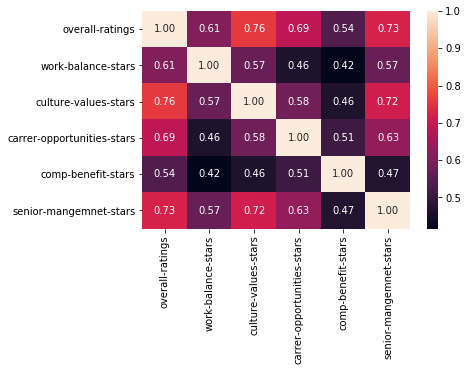

In [18]:
sns.heatmap(dataemp.corr(), annot=True ,fmt=".2f")
plt.show()

# As per correlation index, it is seen that work culture and senior management ratings are highly correlated to the overall ratings of the company

In [19]:
meanval = dataemp['overall-ratings'].mean()

# Classifying labels  - 1 - Satisfied happy employee 0- Employee is not satisfied with job. Greater than mean of overall-rating is considered as satisifed and less than mean of overall-rating is considered as unsatisfied for classification

In [20]:
dataemp['label'] = dataemp['overall-ratings'].apply(lambda x: 1 if x > meanval  else 0)

In [21]:
dataemp.head()

,company,dates,summary,pros,cons,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,label
1,google,"Dec 11, 2018",Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,5.0,4.0,5.0,5.0,4.0,5.0,1
2,google,"Jun 21, 2013","Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4.0,2.0,3.0,3.0,5.0,3.0,1
3,google,"May 10, 2014",Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5.0,5.0,4.0,5.0,5.0,4.0,1
4,google,"Feb 8, 2015",The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5.0,2.0,5.0,5.0,4.0,5.0,1
5,google,"Jul 19, 2018","Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5.0,5.0,5.0,5.0,5.0,5.0,1


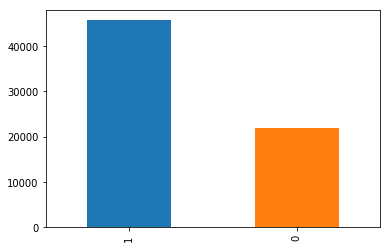

In [22]:
pd.value_counts(dataemp['label']).plot.bar()
plt.show()

In [23]:
def datatext_preprocess(total_text):
    removepunc = [char for char in total_text if char not in string.punctuation]    
    removepunc = ''.join(removepunc)
    re.sub('[^A-Za-z]+', '', removepunc)
    return ' '.join([word for word in removepunc.split() if word.lower() not in stopwords.words('english')])
        

In [24]:
dataemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67529 entries, 1 to 67529
Data columns (total 12 columns):
company                       67529 non-null object
dates                         67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            60369 non-null float64
culture-values-stars          53983 non-null float64
carrer-opportunities-stars    60421 non-null float64
comp-benefit-stars            60368 non-null float64
senior-mangemnet-stars        59754 non-null float64
label                         67529 non-null int64
dtypes: float64(6), int64(1), object(5)
memory usage: 9.2+ MB


In [25]:
dataemp['summary']=dataemp['summary'].fillna("")
dataemp['pros']=dataemp['pros'].fillna("")
dataemp['cons']=dataemp['cons'].fillna("")

In [26]:
dataemp['summary'] = dataemp['summary'].apply(datatext_preprocess)
dataemp['pros'] = dataemp['pros'].apply(datatext_preprocess)
dataemp['cons'] = dataemp['cons'].apply(datatext_preprocess)

After text preprocessing

In [27]:
dataemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67529 entries, 1 to 67529
Data columns (total 12 columns):
company                       67529 non-null object
dates                         67529 non-null object
summary                       67529 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            60369 non-null float64
culture-values-stars          53983 non-null float64
carrer-opportunities-stars    60421 non-null float64
comp-benefit-stars            60368 non-null float64
senior-mangemnet-stars        59754 non-null float64
label                         67529 non-null int64
dtypes: float64(6), int64(1), object(5)
memory usage: 9.2+ MB


In [28]:
dataemp['summary'].head()

1                                    Best Company work
2                   Moving speed light burn inevitable
3    Great balance bigcompany security fun fastmovi...
4                 best place Ive worked also demanding
5                            Unique one kind dream job
Name: summary, dtype: object

In [29]:
labeltext = dataemp.groupby("label")

In [30]:
labeltext.describe()

carrer-opportunities-stars                                               \
                           count      mean       std  min  25%  50%  75%  max   
label                                                                           
0                        19847.0  2.587847  1.126432  1.0  2.0  3.0  3.0  5.0   
1                        40574.0  4.145783  0.905325  1.0  4.0  4.0  5.0  5.0   

      comp-benefit-stars           ...  senior-mangemnet-stars       \
                   count      mean ...                     75%  max   
label                              ...                                
0                19848.0  3.271463 ...                     3.0  5.0   
1                40520.0  4.271199 ...                     5.0  5.0   

      work-balance-stars                                               
                   count      mean       std  min  25%  50%  75%  max  
label                                                                  
0                19842.0  2.387763  1.196678  1.0  1.0  2.0  3.0  5.0  
1                40527.0  3.855750  1.052445  1.0  3.0  4.0  5.0  5.0  

[2 rows x 48 columns]

In [31]:

##wordcloud = WordCloud().generate(dataemp.reviews[0])

Combing all the text data to be used as features for predicting employee sentiment on job satisfaction

In [32]:
dataemp["reviews"] = dataemp["summary"] +' ' + dataemp["pros"]+' ' +dataemp["cons"]


In [33]:
Satisfiedemp = dataemp.loc[dataemp["label"]==1]
UnSatisfiedemp = dataemp.loc[dataemp["label"]==0]

In [34]:
Satisfiedemp.shape

(45688, 13)

In [67]:
ignorewords = Satisfiedemp["pros"].isin(['Amazon','company','work', 'place', 'employee', 'team', 'time'])
satwords = Satisfiedemp.loc[~(ignorewords), "pros"]

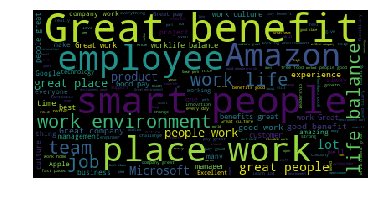

In [68]:
wordcloud = WordCloud().generate(' '.join(satwords))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [71]:
ignorewords = UnSatisfiedemp["cons"].isin(['management','manager','employee', 'Amazon', 'customer', 'team', 'time', 'job', 'people',])
unsatwords = UnSatisfiedemp.loc[~(ignorewords), "cons"]

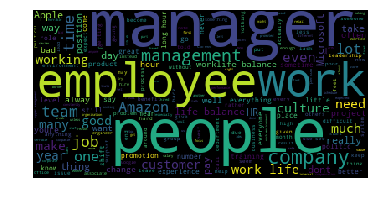

In [72]:
wordcloud = WordCloud().generate(' '.join(unsatwords))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [39]:
X = dataemp["reviews"]
y = dataemp["label"]

Vectorizing the text data 

In [40]:
cv = CountVectorizer()
X = cv.fit_transform(X)


Feeding the output of vectors into TFIDF transformer

In [41]:

tfidf = TfidfTransformer()
tfidf.fit_transform(X)

<67529x49663 sparse matrix of type '<class 'numpy.float64'>'
	with 1922317 stored elements in Compressed Sparse Row format>

Splitting the training and test data in the ratio of 70% training data and 30% test data

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

Naive Bayes Classification model

In [43]:

nb = MultinomialNB()


In [44]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
predictions = nb.predict(X_test)

In [46]:
print(confusion_matrix(y_test, predictions))

[[ 3500  3072]
 [ 1463 12224]]


Accuracy about 77% with Naive Bayes Model

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61      6572
           1       0.80      0.89      0.84     13687

   micro avg       0.78      0.78      0.78     20259
   macro avg       0.75      0.71      0.73     20259
weighted avg       0.77      0.78      0.77     20259



Random Forest Classification Model

In [48]:

RFmodel = RandomForestClassifier(n_estimators=100)

In [49]:
RFmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
predictions = RFmodel.predict(X_test)

In [51]:
print(confusion_matrix(y_test, predictions))

[[ 2203  4369]
 [  519 13168]]


Accuracy for Random Forest is same as Naive Bayes around 76%

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.34      0.47      6572
           1       0.75      0.96      0.84     13687

   micro avg       0.76      0.76      0.76     20259
   macro avg       0.78      0.65      0.66     20259
weighted avg       0.77      0.76      0.72     20259



In [58]:



names = ["Random Forest Classifier","Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(solver='liblinear'),
    LinearSVC(max_iter = 100),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False, max_iter = 100))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(max_iter=5, tol=None),
    PassiveAggressiveClassifier(max_iter=5, tol=None),
    NearestCentroid()
    ]
classifierlist = zip(names,classifiers)
vec = CountVectorizer()

In [59]:
X = dataemp["reviews"]
y = dataemp["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [60]:
def review_summary(pipeline, X_train, X_test, y_train, y_test):
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("Accuracy percentage %: ",accuracy*100)
    print ("Duration in seconds: ",train_test_time)
    print ("Classification report:\n")
    print(classification_report(y_test, y_pred))
    print ("Confusion matrix:\n")
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    print("*"*80)
    return accuracy*100, train_test_time


In [61]:
def classifiervectorizer_compare(vectorizer=vec, n_features=10000,  ngram_range=(1, 1), classifier=classifierlist):
    result = []
    for n,c in classifier:
        vec.set_params(stop_words=None, max_features=n_features, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
                ('vectorizer', vec),
                ('classifier', c)
        ])
            
        print ("Classifier: ", n)
        acc,tt_time = review_summary(checker_pipeline, X_train, X_test, y_train, y_test)
        result.append((n, acc ,tt_time))
    return result

In [62]:
# import warnings filter
from warnings import simplefilter
#from sklearn.utils import ConvergenceWarning
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter('ignore', ConvergenceWarning)

vectorizernames = ["TFIDF vectorizer", "Count Vectorizer"]
vectorizers = [TfidfVectorizer(),CountVectorizer() ]
vectorizerlist = zip(vectorizernames, vectorizers )
tvec = TfidfVectorizer()
cvec = CountVectorizer()
bigram_result = classifiervectorizer_compare(vectorizer=tvec,n_features=100000,ngram_range=(1,2))

Classifier:  Random Forest Classifier
Accuracy percentage %:  75.30480280369218
Duration in seconds:  150.45610332489014
Classification report:

              precision    recall  f1-score   support

           0       0.81      0.31      0.45      6567
           1       0.74      0.97      0.84     13692

   micro avg       0.75      0.75      0.75     20259
   macro avg       0.78      0.64      0.64     20259
weighted avg       0.77      0.75      0.71     20259

Confusion matrix:

[[ 2026  4541]
 [  462 13230]]


********************************************************************************
Classifier:  Logistic Regression
Accuracy percentage %:  77.97522088948122
Duration in seconds:  10.777293682098389
Classification report:

              precision    recall  f1-score   support

           0       0.69      0.58      0.63      6567
           1       0.81      0.87      0.84     13692

   micro avg       0.78      0.78      0.78     20259
   macro avg       0.75      0.73    

C:\Users\jasmi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy percentage %:  74.7322177797522
Duration in seconds:  6.553813457489014
Classification report:

              precision    recall  f1-score   support

           0       0.62      0.58      0.60      6567
           1       0.80      0.83      0.82     13692

   micro avg       0.75      0.75      0.75     20259
   macro avg       0.71      0.70      0.71     20259
weighted avg       0.74      0.75      0.75     20259

Confusion matrix:

[[ 3798  2769]
 [ 2350 11342]]


********************************************************************************
Classifier:  LinearSVC with L1-based feature selection


C:\Users\jasmi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jasmi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy percentage %:  74.89510834690755
Duration in seconds:  12.517682313919067
Classification report:

              precision    recall  f1-score   support

           0       0.62      0.58      0.60      6567
           1       0.80      0.83      0.82     13692

   micro avg       0.75      0.75      0.75     20259
   macro avg       0.71      0.70      0.71     20259
weighted avg       0.74      0.75      0.75     20259

Confusion matrix:

[[ 3784  2783]
 [ 2303 11389]]


********************************************************************************
Classifier:  Multinomial NB
Accuracy percentage %:  78.17266400118466
Duration in seconds:  5.925110816955566
Classification report:

              precision    recall  f1-score   support

           0       0.69      0.59      0.64      6567
           1       0.82      0.87      0.84     13692

   micro avg       0.78      0.78      0.78     20259
   macro avg       0.75      0.73      0.74     20259
weighted avg       0.78    

In [ ]:
bigram_result

On comparing the accuracy and the duration taken for each classifier, Multinomial NB suits best for solving this problem. It has the maximum accuracy of 78.17% and returned in the least duration of all.